In [7]:
import pandas as pd
import numpy as np
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt

# Генерация данных
start_date = '2019-01-01'
end_date = '2022-01-01'

dates = pd.date_range(start=start_date, end=end_date, freq='D')
unix_dates = np.array([int(pd.Timestamp(d).timestamp()) for d in dates])

freq = 'D'  # Monthly frequency
date_rng = pd.date_range(start=start_date, end=end_date, freq=freq)

prices = np.sin(unix_dates)

for i in range(len(prices)):
    prices[i] = prices[i] + float(i) / 50

data = pd.DataFrame({'ds': date_rng, 'y': prices})
data.set_index('ds', inplace=True)


In [8]:
# Разделение данных на train и test
train = data[:'2021-01-01']
test = data['2021-01-01':]

In [3]:
# Поиск оптимальных параметров модели ARIMA с использованием auto_arima
model = auto_arima(train['y'], seasonal=False, stepwise=True, suppress_warnings=True, 
                   error_action="ignore", max_order=None, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2100.141, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2000.861, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.828 seconds


In [4]:
# Обучение модели с найденными оптимальными параметрами
model.fit(train['y'])

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [5]:
# Прогнозирование на тестовом наборе данных
forecast, conf_int = model.predict(n_periods=len(test), return_conf_int=True)

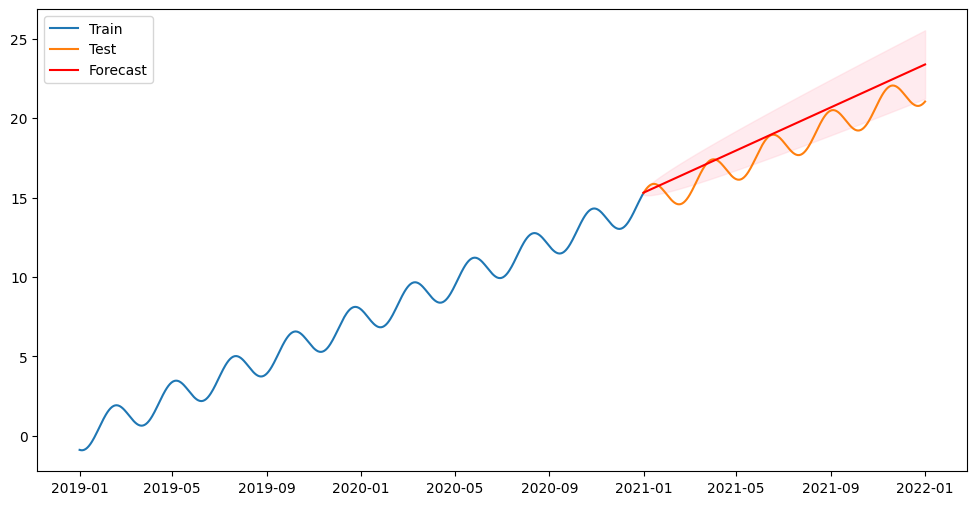

In [6]:
# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['y'], label='Train')
plt.plot(test.index, test['y'], label='Test')
plt.plot(test.index, forecast, label='Forecast', color='r')
plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()